In [1]:
!pip install kaggle

     ---------------------------------------- 63.3/63.3 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=b8b7bd2fba164e43cd4b3fe730cb5cbd89180094813322c113c121a1ea7d834e
  Stored in directory: c:\users\danie\appdata\local\pip\cache\wheels\e6\8e\67\e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle


In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [4]:
api = KaggleApi()
api.authenticate()

In [9]:
cd

C:\Users\danie


In [17]:
DIR = "C:/Users/danie/"

In [21]:
PATH = "Documents/dev/Ai-Machine learning/Transformer - sentiment analysis on movie reviews/"

In [10]:
import os

<h1> Download data and preprocessing </h1>

In [22]:
api.competition_download_file('sentiment-analysis-on-movie-reviews','train.tsv.zip', path=os.path.join(DIR,PATH))

100%|██████████| 1.28M/1.28M [00:00<00:00, 40.5MB/s]

In [24]:
%cd "C:/Users/danie/Documents/dev/Ai-Machine learning/Transformer - sentiment analysis on movie reviews/"

C:\Users\danie\Documents\dev\Ai-Machine learning\Transformer - sentiment analysis on movie reviews


In [26]:
import zipfile
with zipfile.ZipFile('train.tsv.zip','r') as zipref:
    zipref.extractall('./')

In [27]:
import pandas as pd
df = pd.read_csv("train.tsv", sep= '\t')

In [28]:
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [30]:
df.drop_duplicates(subset = "SentenceId", keep="first", inplace = True) 

In [31]:
len(df)

8529

<h1> Encoding Data </h1>

In [35]:
"How many words in each phrase"

'How many words in each phrase'

In [32]:
seqlen = df['Phrase'].apply(lambda x: len(x.split()))

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\danie\AppData\Local\Temp\ipykernel_13784\4018981096.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(seqlen)


<AxesSubplot:xlabel='Phrase', ylabel='Density'>

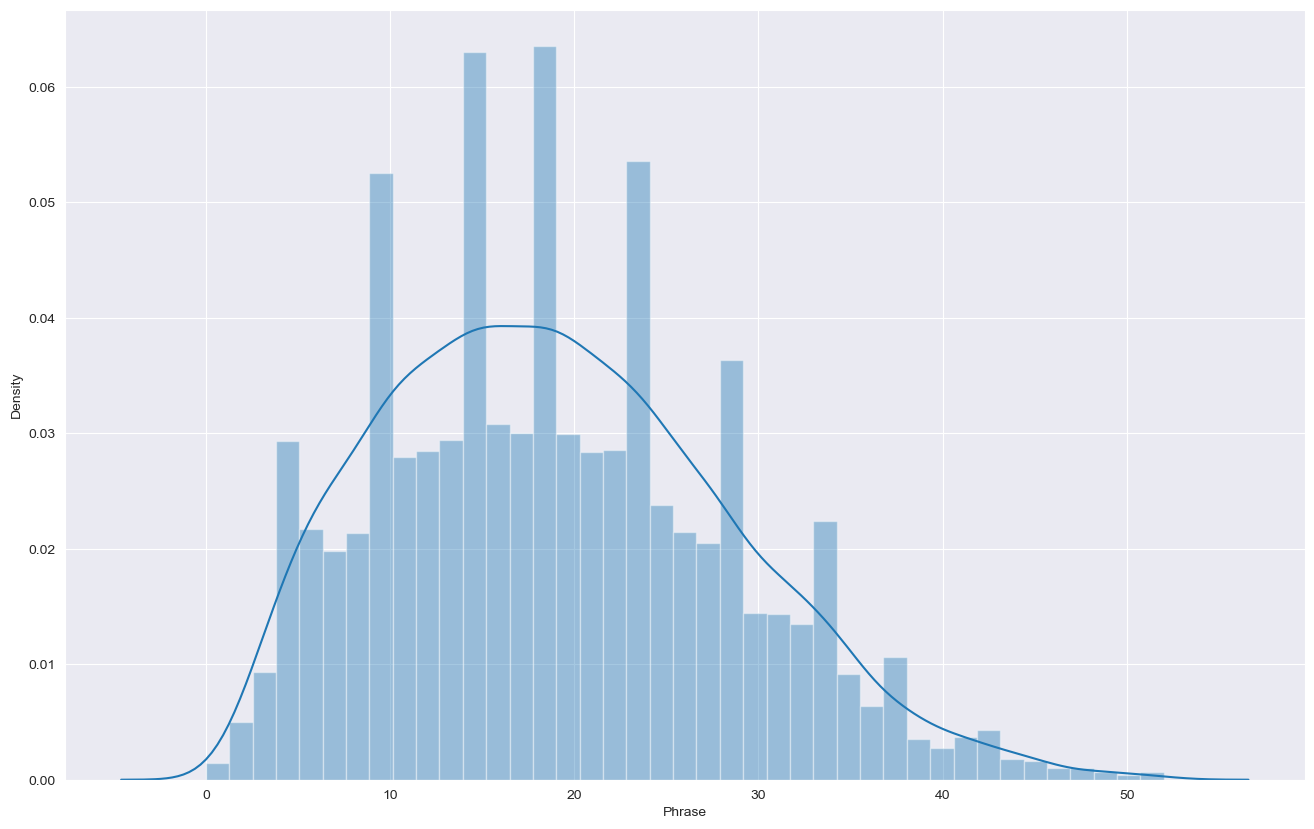

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,10))
sns.distplot(seqlen)

In [36]:
SEQ_LEN = 50

In [37]:
from transformers import AutoTokenizer

ModuleNotFoundError: No module named 'transformers'

In [38]:
!pip install transformers

     ---------------------------------------- 6.3/6.3 MB 4.7 MB/s eta 0:00:00
     -------------------------------------- 267.7/267.7 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 6.8 MB/s eta 0:00:00
     ------------------------------------- 190.3/190.3 kB 11.3 MB/s eta 0:00:00


In [39]:
from transformers import AutoTokenizer

In [40]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')

In [45]:
tokens = tokenizer.encode_plus("hello world", max_length= SEQ_LEN, truncation=True, padding="max_length", 
                               add_special_tokens = True, return_token_type_ids=False, return_attention_mask=True,
                              return_tensors= 'tf')

In [46]:
tokens

{'input_ids': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[  101, 19082,  1362,   102,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0]])>, 'attention_mask': <tf.Tensor: shape=(1, 50), dtype=int32, numpy=
array([[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0]])>}

In [47]:
import numpy as np

In [48]:
Xids = np.zeros((len(df), SEQ_LEN))

In [49]:
Xmask = np.zeros((len(df), SEQ_LEN))

In [51]:
Xids.shape

(8529, 50)

In [55]:
for i, sequence in enumerate(df['Phrase']):
    tokens = tokenizer.encode_plus(sequence, max_length = SEQ_LEN,
                                   truncation=True, padding = "max_length",
                                   add_special_tokens=True, return_token_type_ids=False,
                                   return_attention_mask= True, return_tensors='tf')
    Xids[i,:], Xmask[i,:] = tokens['input_ids'], tokens['attention_mask']

In [56]:
Xids

array([[ 101.,  138., 1326., ...,    0.,    0.,    0.],
       [ 101., 1188., 3589., ...,    0.,    0.,    0.],
       [ 101., 2431., 3899., ...,    0.,    0.,    0.],
       ...,
       [ 101.,  118.,  149., ...,    0.,    0.,    0.],
       [ 101., 1109., 2523., ...,    0.,    0.,    0.],
       [ 101., 1109., 1273., ...,    0.,    0.,    0.]])

In [57]:
Xmask

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

In [59]:
df.Sentiment.unique

<bound method Series.unique of 0         1
63        4
81        1
116       3
156       1
         ..
155984    2
155997    2
156021    1
156031    1
156039    2
Name: Sentiment, Length: 8529, dtype: int64>

<h1> One hot encoding </h1>

In [61]:
arr = df['Sentiment'].values
arr.size

8529

In [62]:
labels = np.zeros((arr.size, arr.max()+1))
labels.shape

(8529, 5)

In [63]:
labels[np.arange(arr.size),arr] = 1
labels

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [64]:
with open('xids.npy', 'wb') as f:
    np.save(f, Xids)
with open('xmask.npy', 'wb') as f:
    np.save(f, Xmask)
with open('labels.npy', 'wb') as f:
    np.save(f, labels)

del df, Xids, Xmask, labels

In [65]:
with open('xids.npy', 'rb') as fp:
    Xids = np.load(fp)
with open('xmask.npy', 'rb') as fp:
    Xmask = np.load(fp)
with open('labels.npy', 'rb') as fp:
    labels = np.load(fp)

<h1> Adding these arrays in tensorflow dataset structure </h1>

In [66]:
import tensorflow as tf
tf.config.experimental.list_logical_devices('GPU')

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]

In [67]:
dataset = tf.data.Dataset.from_tensor_slices((Xids,Xmask,labels))

In [68]:
"Create generator that contains all data in tuples"

'Create generator that contains all data in tuples'

In [69]:
for i in dataset.take(1):
    print(i)

(<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [71]:
"Tensorflow expects input data in tuple format, 0 index values 1 index labels"

'Tensorflow expects input data in tuple format, 0 index values 1 index labels'

In [75]:
def map_func(input_ids, masks, labels):
    return {'input_ids' : input_ids, 'attention_mask' : masks}, labels

In [73]:
"Mapping the function to return tuple"

'Mapping the function to return tuple'

In [76]:
dataset = dataset.map(map_func)

In [77]:
for i in dataset.take(1):
    print(i)

({'input_ids': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([  101.,   138.,  1326.,  1104., 13936., 25265., 16913., 15107.,
        1103.,  8050.,  2553.,  1115.,  1184.,  1110.,  1363.,  1111.,
        1103., 20398.,  1110.,  1145.,  1363.,  1111.,  1103.,   176.,
        9900.,   117.,  1199.,  1104.,  1134.,  5411.,  1821., 14225.,
        1133.,  3839.,  1104.,  1134.,  7919.,  1106.,  1277.,  1104.,
         170.,  1642.,   119.,   102.,     0.,     0.,     0.,     0.,
           0.,     0.])>, 'attention_mask': <tf.Tensor: shape=(50,), dtype=float64, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])>}, <tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 0., 0., 0.])>)


In [78]:
"We have created a input dictionary that is formed by attention and mask, and te tensor array of labels"

'We have created a input dictionary that is formed by attention and mask, and te tensor array of labels'

Shuffling and batching


In [79]:
dataset = dataset.shuffle(100000).batch(32)

In [80]:
"Splitting into training and validation sets"

'Splitting into training and validation sets'

In [81]:
DS_LEN = len(list(dataset))

In [82]:
DS_LEN

267

In [83]:
SPLIT = .9

In [84]:
train = dataset.take(round(DS_LEN*SPLIT))
val = dataset.skip(round(DS_LEN*SPLIT))

del dataset

<h1> Building Model Architecture </h1>

In [85]:
from transformers import TFAutoModel


In [86]:
bert = TFAutoModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [92]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name = 'input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name = 'attention_mask', dtype='int32')

embeddings = bert(input_ids, attention_mask = mask)[0]

X = tf.keras.layers.GlobalMaxPool1D()(embeddings)
X = tf.keras.layers.BatchNormalization()(X)
X = tf.keras.layers.Dense(128, activation='relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(32, activation='relu')(X)
y = tf.keras.layers.Dense(5, activation = 'softmax', name = 'output')(X)

model = tf.keras.Model(inputs=[input_ids, mask], outputs = y)

model.layers[2].trainable = False


In [93]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 50)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 50)]         0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 50,                                          

Optimizer

In [97]:
Optimizer = tf.keras.optimizers.Adam(0.01)
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer = Optimizer, loss = loss, metrics= [acc])

In [99]:
history = model.fit(
    train,
    validation_data = val,
    epochs = 140)

Epoch 1/140
240/240 [==============================] - 31s 90ms/step - loss: 1.4734 - accuracy: 0.3616 - val_loss: 1.3271 - val_accuracy: 0.3969
Epoch 2/140
240/240 [==============================] - 18s 75ms/step - loss: 1.3506 - accuracy: 0.4092 - val_loss: 1.2794 - val_accuracy: 0.4323
Epoch 3/140
240/240 [==============================] - 18s 75ms/step - loss: 1.3325 - accuracy: 0.4046 - val_loss: 1.3245 - val_accuracy: 0.4370
Epoch 4/140
240/240 [==============================] - 18s 76ms/step - loss: 1.3400 - accuracy: 0.4077 - val_loss: 1.2333 - val_accuracy: 0.4582
Epoch 5/140
240/240 [==============================] - 18s 76ms/step - loss: 1.3095 - accuracy: 0.4236 - val_loss: 1.2129 - val_accuracy: 0.4629
Epoch 6/140
240/240 [==============================] - 18s 76ms/step - loss: 1.3098 - accuracy: 0.4298 - val_loss: 1.2961 - val_accuracy: 0.4240
Epoch 7/140
240/240 [==============================] - 18s 76ms/step - loss: 1.2976 - accuracy: 0.4285 - val_loss: 1.1721 - val_ac